**AAPLE STOCK(AAPL) Analysis**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Standard Look-back Call Option Value: 51.44912754028936


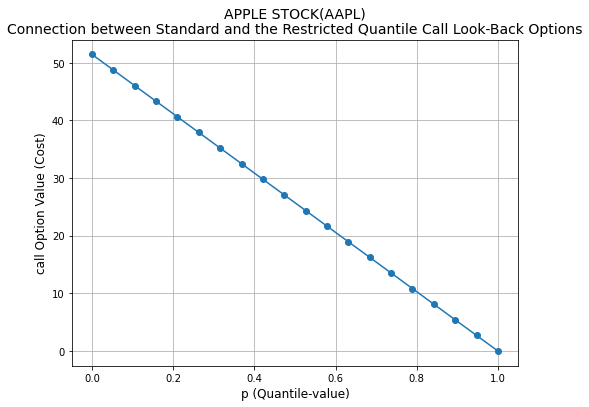

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
from datetime import datetime, timedelta

# Define parameters
ticker_symbol = "AAPL"  # APPLE STOCK ticker
end_date = "2024-06-30"
start_date = (datetime.strptime(end_date, "%Y-%m-%d") - timedelta(days=180)).strftime("%Y-%m-%d")

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract close prices as a list
close_prices = data['Close'].values.tolist()
end_price = close_prices[-1]  # Close price at the end date

# Create the three lists
list_1 = close_prices  # All close prices
list_2 = [price for price in close_prices if price <= end_price]  # Prices <= end price
list_3 = [price for price in close_prices if price >= end_price]  # Prices >= end price

flat_list1 = [item[0] for item in list_1]
flat_list2=[item[0] for item in list_2]
flat_list3=[item[0] for item in list_3]

prices_series = pd.Series(flat_list1)

# Calculate simple returns
returns = prices_series.pct_change().dropna()

# Calculate volatility (standard deviation of returns)
vol = returns.std()
anualized_vol=vol*np.sqrt(252)
# Define the ticker for the 13-week Treasury bill rate (^IRX)
ticker = "^IRX"

# Fetch historical data for the range around the target date
data = yf.download(ticker, start="2024-06-01", end="2024-07-01")

# Check if the target date is in the data
if end_date in data.index.strftime('%Y-%m-%d'):
    closing_rate = data.loc[data.index[data.index.strftime('%Y-%m-%d') == end_date], "Close"].values[0]
else:
    # Use the last available trading day before the target date
    previous_trading_day = data.index[-1]
    closing_rate = data.loc[previous_trading_day, "Close"]

# Print only the interest rate
r=closing_rate[0]/100
# Define the variables
S_t = end_price[0] # Current stock price
m_t = min(flat_list1) # Minimum stock price
  # Risk-free interest rate
sigma = anualized_vol  # Volatility
t = 0.5  # Time to maturity (in years)

# Calculate d_m
d_m = (math.log(S_t / m_t) + (r + (sigma**2) / 2) * t) / (sigma * math.sqrt(t))

# Calculate the option value
option_value = (
    S_t * norm.cdf(d_m) -
    math.exp(-r * t) * m_t * norm.cdf(d_m - sigma * math.sqrt(t)) +
    math.exp(-r * t) * (sigma**2 / (2 * r)) * S_t * (
        (S_t / m_t)**(-2 * r / sigma**2) * norm.cdf(-d_m + (2 * r / sigma) * math.sqrt(t)) -
        math.exp(r * t) * norm.cdf(-d_m)
    )
)

# Output the result
print("Standard Look-back Call Option Value:", option_value)



# Define variables
p_values = np.linspace(0, 1, 20)  # 20 points in [0, 1]
final_option_values = []

# Calculate final_option_value for each p
for p in p_values:
    final_option_value = (1 - p) * option_value
    final_option_values.append(final_option_value)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(p_values, final_option_values, marker='o')
plt.title("APPLE STOCK(AAPL)\nConnection between Standard and the Restricted Quantile Call Look-Back Options", fontsize=14)
plt.xlabel("p (Quantile-value)", fontsize=12)
plt.ylabel("call Option Value (Cost)", fontsize=12)
plt.grid(True)
plt.show()




Standard Look-back Put Option Value: 27.736367031061263


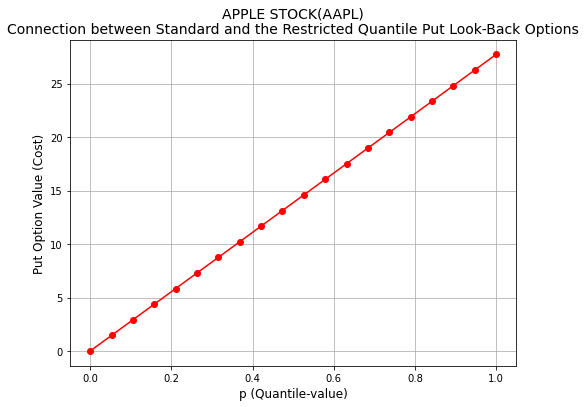

In [2]:
# Define the variables
S_t = end_price[0] # Current stock price
M_t = max(flat_list1) # Minimum stock price
  # Risk-free interest rate
sigma = anualized_vol  # Volatility
t = 0.5  # Time to maturity (in years)

# Calculate d_M
d_M = (math.log(S_t / M_t) + (r + (sigma**2) / 2) * t) / (sigma * math.sqrt(t))

# Calculate the option value
put_option_value = (
    math.exp(-r * t) * M_t * norm.cdf(-d_M + sigma * math.sqrt(t)) - S_t * norm.cdf(-d_M) +
    math.exp(-r * t) * (sigma**2 / (2 * r)) * S_t * (
        -(S_t / M_t)**(-2 * r / sigma**2) * norm.cdf(d_M - (2 * r / sigma) * math.sqrt(t)) +
        math.exp(r * t) * norm.cdf(d_M)
    )
)

# Output the result
print("Standard Look-back Put Option Value:", put_option_value)



# Define variables
p_values = np.linspace(0, 1, 20)  # 20 points in [0, 1]
final_put_option_values = []

# Calculate final_option_value for each p
for p in p_values:
    put_final_option_value = p* put_option_value
    final_put_option_values.append(put_final_option_value)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(p_values, final_put_option_values, marker='o', color='r')
plt.title("APPLE STOCK(AAPL)\nConnection between Standard and the Restricted Quantile Put Look-Back Options", fontsize=14)
plt.xlabel("p (Quantile-value)", fontsize=12)
plt.ylabel("Put Option Value (Cost)", fontsize=12)
plt.grid(True)
plt.show()


**GOOGLE STOCK(GOOGL) Analysis**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Standard Look-back Call Option Value: 55.10840724909967


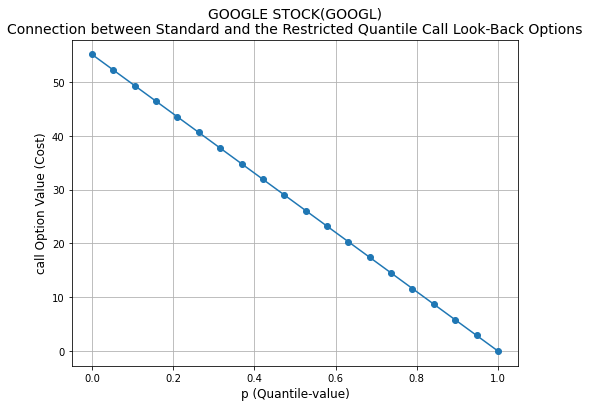

In [3]:
# Define parameters
ticker_symbol = "GOOGL"  # APPLE STOCK ticker
end_date = "2024-06-30"
start_date = (datetime.strptime(end_date, "%Y-%m-%d") - timedelta(days=180)).strftime("%Y-%m-%d")

# Fetch historical data
data1 = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract close prices as a list
close_prices1 = data1['Close'].values.tolist()
end_price1 = close_prices1[-1]  # Close price at the end date

# Create the three lists
list_11 = close_prices1  # All close prices
list_21 = [price for price in close_prices1 if price <= end_price1]  # Prices <= end price
list_31 = [price for price in close_prices1 if price >= end_price1]  # Prices >= end price

flat_list11 = [item[0] for item in list_11]
flat_list21=[item[0] for item in list_21]
flat_list31=[item[0] for item in list_31]

prices_series1 = pd.Series(flat_list11)

# Calculate simple returns
returns1 = prices_series1.pct_change().dropna()

# Calculate volatility (standard deviation of returns)
vol1 = returns1.std()
anualized_vol1=vol1*np.sqrt(252)
# Define the ticker for the 13-week Treasury bill rate (^IRX)
ticker = "^IRX"

# Fetch historical data for the range around the target date
data = yf.download(ticker, start="2024-06-01", end="2024-07-01")

# Check if the target date is in the data
if end_date in data.index.strftime('%Y-%m-%d'):
    closing_rate = data.loc[data.index[data.index.strftime('%Y-%m-%d') == end_date], "Close"].values[0]
else:
    # Use the last available trading day before the target date
    previous_trading_day = data.index[-1]
    closing_rate = data.loc[previous_trading_day, "Close"]

# Print only the interest rate
r=closing_rate[0]/100
# Define the variables
S_t1 = end_price1[0] # Current stock price
m_t1 = min(flat_list11) # Minimum stock price
  # Risk-free interest rate
sigma1 = anualized_vol1  # Volatility
t = 0.5  # Time to maturity (in years)

# Calculate d_m
d_m1 = (math.log(S_t1 / m_t1) + (r + (sigma1**2) / 2) * t) / (sigma1 * math.sqrt(t))

# Calculate the option value
option_value1 = (
    S_t1 * norm.cdf(d_m1) -
    math.exp(-r * t) * m_t1 * norm.cdf(d_m1 - sigma1 * math.sqrt(t)) +
    math.exp(-r * t) * (sigma1**2 / (2 * r)) * S_t1 * (
        (S_t1 / m_t1)**(-2 * r / sigma1**2) * norm.cdf(-d_m1 + (2 * r / sigma1) * math.sqrt(t)) -
        math.exp(r * t) * norm.cdf(-d_m1)
    )
)

# Output the result
print("Standard Look-back Call Option Value:", option_value1)



# Define variables
p_values = np.linspace(0, 1, 20)  # 20 points in [0, 1]
final_option_values1 = []

# Calculate final_option_value for each p
for p in p_values:
    final_option_value1 = (1 - p) * option_value1
    final_option_values1.append(final_option_value1)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(p_values, final_option_values1, marker='o')
plt.title("GOOGLE STOCK(GOOGL)\nConnection between Standard and the Restricted Quantile Call Look-Back Options", fontsize=14)
plt.xlabel("p (Quantile-value)", fontsize=12)
plt.ylabel("call Option Value (Cost)", fontsize=12)
plt.grid(True)
plt.show()



Standard Look-back Put Option Value: 28.47434094037067


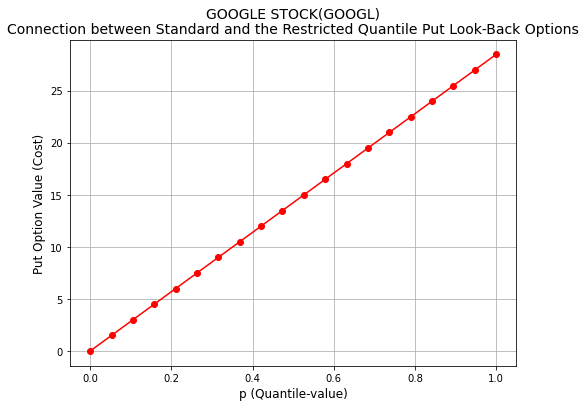

In [4]:
# Define the variables
S_t1 = end_price1[0] # Current stock price
M_t1 = max(flat_list11) # Minimum stock price
  # Risk-free interest rate
sigma1 = anualized_vol1  # Volatility
t = 0.5  # Time to maturity (in years)

# Calculate d_M
d_M1 = (math.log(S_t1 / M_t1) + (r + (sigma1**2) / 2) * t) / (sigma1 * math.sqrt(t))

# Calculate the option value
put_option_value1 = (
    math.exp(-r * t) * M_t1 * norm.cdf(-d_M1 + sigma1 * math.sqrt(t)) - S_t1 * norm.cdf(-d_M1) +
    math.exp(-r * t) * (sigma1**2 / (2 * r)) * S_t1 * (
        -(S_t1 / M_t1)**(-2 * r / sigma1**2) * norm.cdf(d_M1 - (2 * r / sigma1) * math.sqrt(t)) +
        math.exp(r * t) * norm.cdf(d_M1)
    )
)

# Output the result
print("Standard Look-back Put Option Value:", put_option_value1)



# Define variables
p_values = np.linspace(0, 1, 20)  # 20 points in [0, 1]
final_put_option_values1 = []

# Calculate final_option_value for each p
for p in p_values:
    put_final_option_value1 = p* put_option_value1
    final_put_option_values1.append(put_final_option_value1)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(p_values, final_put_option_values1, marker='o', color='r')
plt.title("GOOGLE STOCK(GOOGL)\nConnection between Standard and the Restricted Quantile Put Look-Back Options", fontsize=14)
plt.xlabel("p (Quantile-value)", fontsize=12)
plt.ylabel("Put Option Value (Cost)", fontsize=12)
plt.grid(True)
plt.show()